In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#predicting persetujuan kartu kredit
df= pd.read_csv('crx.data') 
df.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [3]:
df = df.rename(columns={'A1':'Gender', 'A2':'Age','A3':'Debt', 'A4':'Married', 'A5':'BankCustomer', 'A6':'EducationLevel','A7':'Ethnicity','A8':'YearsEmployed','A9':'PriorDefault','A10':'Employed', 'A11':'CreditScore', 'A12':'DriversLicense','A13':'Citizen', 'A14':'ZipCode', 'A15':'Income','A16':'ApprovalStatus'})
df.head(2)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+


In [4]:
#isnull digunakan untuk cek missing value ada atau tidak 
print(df.isnull().sum())

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64


In [5]:
df.dtypes

Gender             object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode           float64
Income              int64
ApprovalStatus     object
dtype: object

In [6]:
#merubah ? menjadi nan
df = df.replace('?',np.NaN)

In [7]:
#handle missing value float,,,
df['Age'] = df['Age'].fillna((df['Age'].mean()))
df['Debt'] = df['Debt'].fillna((df['Debt'].mean()))
df['ZipCode'] = df['ZipCode'].fillna((df['ZipCode'].mean()))
# print(df.isnull().sum())
# df.head(2)

In [8]:
#non numerik
for col in df.columns:
    if df[col].dtype == 'object':
        df = df.fillna(max(df[col].value_counts()))
        
print(df.isnull().sum()) 

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64


In [9]:
le=LabelEncoder()

for col in df.columns.to_numpy():
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col].astype(str))
# df.dtypes
df.head(2)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,2,30.83,0.00,2,1,13,8,1.25,1,1,1,0,0,202.0,0,0
1,1,58.67,4.46,2,1,11,4,3.04,1,1,6,0,0,43.0,560,0


In [10]:
#drop driverlicense(sim) dan zipcode (kodepos)
df.drop(['DriversLicense','ZipCode'], axis=1, inplace=True)
df.head(2)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
0,2,30.83,0.00,2,1,13,8,1.25,1,1,1,0,0,0
1,1,58.67,4.46,2,1,11,4,3.04,1,1,6,0,560,0


In [11]:
#split 
target = df['ApprovalStatus']
X_train,X_test,Y_train,Y_test = train_test_split(df,target,random_state = 0)

In [12]:
#standardize
from sklearn import preprocessing
minmax_scaler=preprocessing.MinMaxScaler()         
X_train_scaler=minmax_scaler.fit_transform(X_train)         #mentransformasi data X train
X_test_scaler=minmax_scaler.fit_transform(X_test)
# x_test_scaler

In [13]:
clf=Perceptron(tol=0.1,max_iter=500)
clf.fit(X_train_scaler,Y_train)

Perceptron(max_iter=500, tol=0.1)

In [14]:
from sklearn.metrics import accuracy_score
prediksi=clf.predict(X_test_scaler)

In [15]:
print(prediksi)
print(Y_test)
print()
print('Misclassified samples using Perceptron are: %d' %(Y_test!=prediksi).sum())
print()
print('Classification Accuracy of Perceptron is %.2f' % accuracy_score(Y_test, prediksi))

[0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1
 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1
 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0
 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0]
14     0
586    0
140    0
492    0
350    1
      ..
547    0
319    0
462    1
478    1
12     0
Name: ApprovalStatus, Length: 173, dtype: int32

Misclassified samples using Perceptron are: 0

Classification Accuracy of Perceptron is 1.00


In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediksi))

[[79  0]
 [ 0 94]]


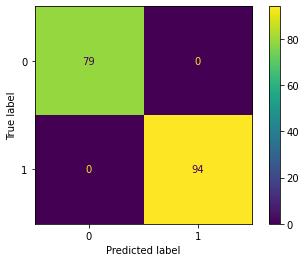

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, prediksi, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

plt.show()
# print(confusion_matrix(Y_test, prediksi))

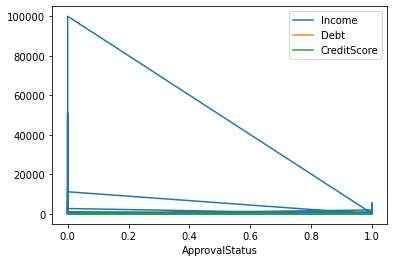

In [18]:
import matplotlib.pyplot as plt
df.plot(x="ApprovalStatus", y=['Income','Debt','CreditScore'])
plt.show()